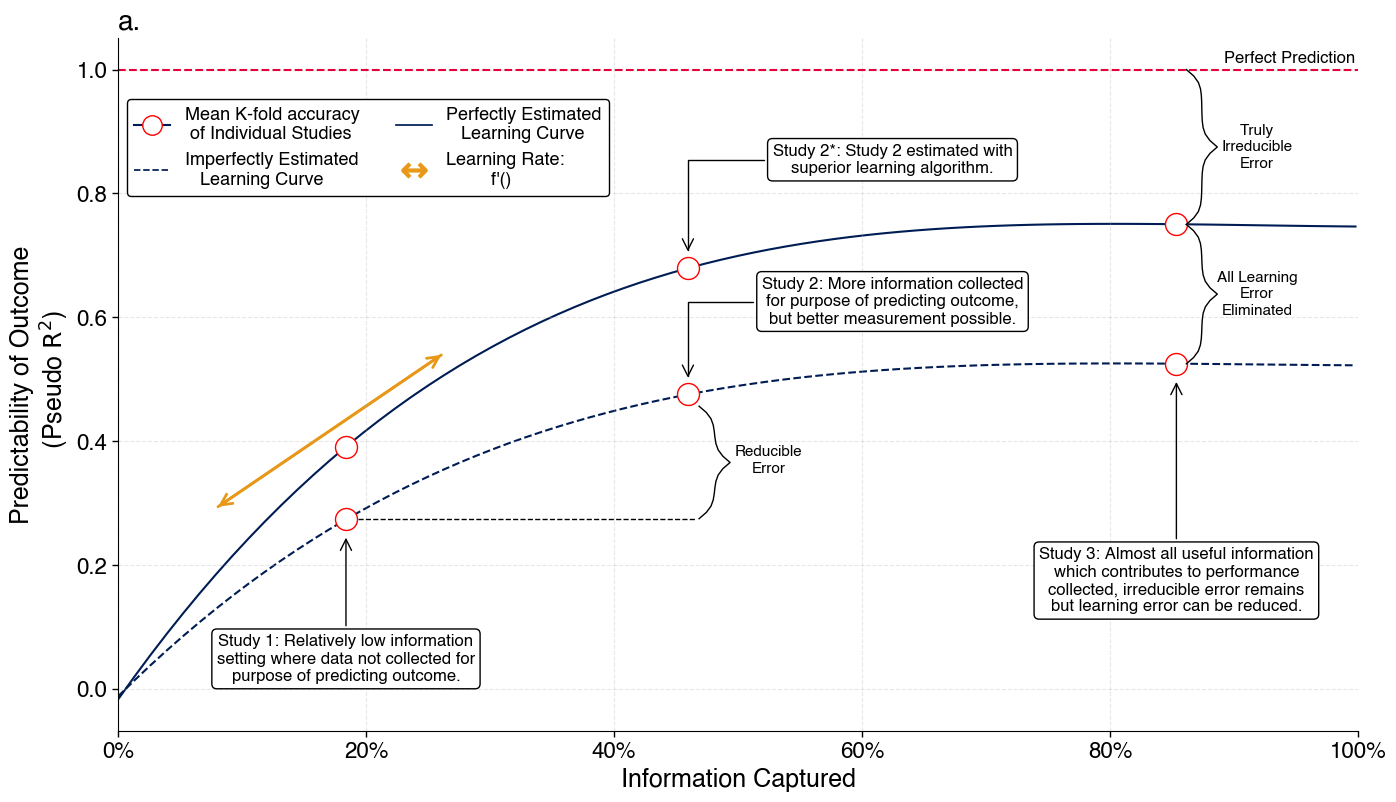

In [1]:
import os
import numpy as np
import seaborn as sns
import matplotlib as mpl
import warnings
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.lines import Line2D
from matplotlib.patches import FancyArrowPatch
from scipy.optimize import curve_fit
import matplotlib.patches as patches
from figure_helpers import draw_brace, polynomial_function
mpl.rcParams['font.family'] = 'Helvetica'
warnings.simplefilter("ignore", UserWarning)

fig, ax1 = plt.subplots(figsize=(16, 9))

x_data = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
y_data = np.array([0, 0.2, 0.4, 0.6, 0.65, 0.675, 0.725, .75, 0.75, 0.75, 0.75, 0.75, 0.75])
degree = 4
initial_guess = np.ones(degree + 1)  # Initial guess for coefficients
params, covariance = curve_fit(polynomial_function, x_data, y_data, p0=initial_guess)
x1_fit = np.linspace(0, max(x_data) + 1, 100)
y1_fit = polynomial_function(x1_fit, *params)
ax1.plot(x1_fit[:-23], y1_fit[:-23], color='#001c54', linestyle='-', zorder=1)
ax1.scatter(x1_fit[14], y1_fit[14], facecolor='w', edgecolor='r', s=[250], alpha=1, marker='o', zorder=2)
ax1.scatter(x1_fit[35], y1_fit[35], facecolor='w', edgecolor='r', s=[250], alpha=1, marker='o', zorder=2)
ax1.scatter(x1_fit[65], y1_fit[65], facecolor='w', edgecolor='r', s=[250], alpha=1, marker='o', zorder=2)
study2star = y1_fit[35]
bracket1_x = x1_fit[65]
bracket1_y1 = y1_fit[65]
y_data = y_data * 0.7
degree = 4
initial_guess = np.ones(degree + 1)  # Initial guess for coefficients
params, covariance = curve_fit(polynomial_function, x_data, y_data, p0=initial_guess)
x1_fit = np.linspace(0, max(x_data) + 1, 100)
y1_fit = polynomial_function(x1_fit, *params)
ax1.plot(x1_fit[:-23], y1_fit[:-23], color='#001c54', linestyle='--', zorder=1)
ax1.scatter(x1_fit[14], y1_fit[14], facecolor='w', edgecolor='r', s=[250], alpha=1, marker='o', zorder=2)
ax1.scatter(x1_fit[35], y1_fit[35], facecolor='w', edgecolor='r', s=[250], alpha=1, marker='o', zorder=2)
ax1.scatter(x1_fit[65], y1_fit[65], facecolor='w', edgecolor='r', s=[250], alpha=1, marker='o', zorder=2)
bracket1_y2 = y1_fit[65]

ax1.set_title('a.', fontsize=20, loc='left')
ax1.grid(which="both", linestyle='--', alpha=0.3)
ax1.tick_params(width=1, length=4, axis='both', which='major', labelsize=16)
ax1.axhline(y=1, color='#E4003B', linestyle='--', linewidth=1.5)
ax1.axhline(y=y1_fit[14], xmin=x1_fit[14]-1.645, xmax=x1_fit[35]-4.13, color='k', linestyle='--', linewidth=1)
ax1.set_xticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
ax1.set_ylabel('Predictability of Outcome\n     (Pseudo $\mathrm{R}^2$)    ', fontsize=18)
ax1.set_xlabel('Information Captured', fontsize=18)    
ax1.set_xlim(0,10)

arrow1 = patches.FancyArrowPatch(
    (x1_fit[6], y1_fit[6]+.1625), (x1_fit[20], y1_fit[20]+.1875), 
    mutation_scale=20,  # Adjust size of the arrowhead
    color='#E89818', 
    arrowstyle='->',  # Triangle arrowhead
    linewidth=2
)
arrow2 = patches.FancyArrowPatch(
    (x1_fit[20], y1_fit[20]+.1875), (x1_fit[6], y1_fit[6]+.1625), 
    mutation_scale=20,  # Adjust size of the arrowhead
    color='#E89818', 
    arrowstyle='->',  # Triangle arrowhead
    linewidth=2
)
ax1.add_patch(arrow1)
ax1.add_patch(arrow2)

ax1.annotate('Study 1: Relatively low information\nsetting where data not collected for\npurpose of predicting outcome.',
             xy=(x1_fit[14], y1_fit[14]-.025),
             xytext=(x1_fit[14], y1_fit[14]-.225),
             ha='center',
             va='center',
             fontsize=12,
             bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="w"),
             arrowprops=dict(arrowstyle='->',
                             connectionstyle="arc3,rad=0",
                             color='black',
                             mutation_scale=20,
                             lw=1))
ax1.annotate(
    'Study 2: More information collected\nfor purpose of predicting outcome,\nbut better measurement possible.',
    xy=(x1_fit[35], y1_fit[35]+0.0225),
    xytext=(x1_fit[35] + 1.65, y1_fit[35] + 0.15),
    ha='center',
    va='center',
    fontsize=12,
    bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="w"),
    arrowprops=dict(
        arrowstyle='->',
        connectionstyle="angle,angleA=0,angleB=90,rad=0",
        color='black',
        mutation_scale=20,
        lw=1
    ))
ax1.annotate(
    'Study 2*: Study 2 estimated with\nsuperior learning algorithm.',
    xy=(x1_fit[35], study2star+0.0225),
    xytext=(x1_fit[35] + 1.65, study2star + 0.175),
    ha='center',
    va='center',
    fontsize=12,
    bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="w"),
    arrowprops=dict(
        arrowstyle='->',
        connectionstyle="angle,angleA=0,angleB=90,rad=0",
        color='black',
        mutation_scale=20,
        lw=1
    ))
ax1.annotate('Study 3: Almost all useful information\nwhich contributes to performance\ncollected, irreducible error remains\nbut learning error can be reduced.',
             xy=(x1_fit[65], y1_fit[65]-.025),
             xytext=(x1_fit[65], y1_fit[65]-.35),
             ha='center',
             va='center',
             fontsize=12,
             bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="w"),
             arrowprops=dict(arrowstyle='->',
                             connectionstyle="arc3,rad=0",
                             color='black',
                             mutation_scale=20,
                             lw=1))
legend_elements = [
    Line2D([0], [0], marker='o', color='#001c54', markerfacecolor='w', markeredgecolor='r', markersize=14,
           label='Mean K-fold accuracy\n of Individual Studies'),
    Line2D([0], [0], color='#001c54', linestyle='--', linewidth=1.25,
           label='Imperfectly Estimated\n   Learning Curve'),
    Line2D([0], [0], color='#001c54', linestyle='-', linewidth=1.25,
           label='Perfectly Estimated\n   Learning Curve'),
    Line2D([0], [0], color='#E89818', marker='$\leftrightarrow$', markersize=18, linewidth=0,
           label="Learning Rate:\n         f'()")
]
ax1.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(0, 0.925), frameon=True,
           fontsize=13, framealpha=1, facecolor='w', edgecolor='black', ncols=2)
draw_brace(ax1, .25, (bracket1_x+1.455, .875), 'Truly\nIrreducible\nError', (bracket1_x+.65, .8375),
           brace_scale=0.25, beta_scale=1000., rotate=True, rotate_text=False)
draw_brace(ax1, .225, (bracket1_x+1.455, .6375), 'All Learning\nError\nEliminated', (bracket1_x+.65, .6),
           brace_scale=0.25, beta_scale=1000., rotate=True, rotate_text=False)
draw_brace(ax1, .1815, (x1_fit[35]+1.465, y1_fit[14]+.092), "Reducible\nError", (x1_fit[35]+.65, .345),
           brace_scale=0.25, beta_scale=1000., rotate=True, rotate_text=False)
ax1.annotate(
    'Perfect Prediction',
    xy=(0.945, 0.96),  # Position relative to the axes
    xycoords='axes fraction',
    ha='center',
    va='bottom',
    fontsize=12,
    color='black'
)
sns.despine()
plt.savefig(os.path.join(os.getcwd(),
                             '..',
                             'output',
                             'unpredictability_figure.pdf'),
                bbox_inches='tight')